In [21]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [22]:
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
print(X)

[[-2.04582165 -0.13791624 -0.08071423 ...  2.48194524  0.74236675
   0.23154789]
 [-0.98726024  1.30120189  2.37734888 ...  0.55445754 -0.21892143
  -0.37608578]
 [ 0.57335921  0.09375582  0.4662521  ... -0.6088508   0.79903499
  -0.17121177]
 ...
 [-0.70737159  1.07650943  0.58510456 ... -1.51337602  0.90239871
  -0.69230951]
 [-0.20706849  1.17319848 -1.94478665 ... -0.32820676  1.5711921
   1.14877729]
 [-2.16769231 -2.54871672  2.89359255 ...  0.71535366  0.34329241
   1.07350284]]


In [23]:
# determine the number of input features
n_features = X.shape[1]

In [24]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [25]:
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

In [26]:
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

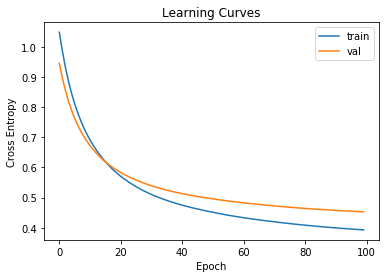

In [27]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()